# Get to know the data

In this notebook I want to discover the data in order to build a CNN. It should be able to predict the age of wood based on the wooden samples' absorbance of Near-Infrared light. 

# Load the necessary libraries

In [1]:
import os
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import numpy as np

2024-06-17 11:45:38.865792: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import the data

In [2]:
csv_directory = '/home/mel/Masterthesis/Masterthesis_code/raw_data/csv/'

# Look at all files in the directory an then chose dpsDeriv1200.csv which contain the dataframes of our interest
all_csv_files = [f for f in os.listdir(csv_directory) if f.endswith('.csv')]
print(all_csv_files)
csv_files = ['dpsDeriv1200.csv','dpsDeriv1200.csv']

['dpsUNsub1.csv', 'dpsDeriv1200AUT.csv', 'dpsDerivSK.csv', 'dpsDeriv1200.csv', 'dpsSK.csv', 'dpsWOCHPls1.csv', 'dps1200POL.csv', 'dpsDeriv1200Pls1.csv', 'dpsDerivPls1.csv', 'dps1200AUT.csv', 'dps.csv', 'dpsDeriv1200POL.csv', 'dpsDerivUNsub1.csv', 'dpsUN.csv', 'dpsDerivLUO.csv', 'dps1200Pls1.csv', 'dpsExcl.csv', 'dps1200_all.csv', 'dpsDeriv.csv', 'dpsUNsub3.csv', 'dpsLUO.csv', 'dpsPls1.csv', 'dpsDerivUN.csv', 'dpsDerivWOCHPls1.csv', 'dpsDeriv1200SK.csv', 'dps1200SK.csv', 'dpsDerivWOCH.csv', 'dpsDerivExcl.csv', 'dpsUNsub2.csv', 'dpsDerivUNsub3.csv', 'dps1200.csv', 'dpsDerivUNsub2.csv', 'dpsWOCH.csv']


In [3]:
dpsDeriv1200 = pd.read_csv(f'{csv_directory}/dpsDeriv1200.csv')

## About the dataframe

There are 2 dataframes.

dps1200 = data from Pinus silvestris. It contains only samples which are dated to the year 1200 and younger. The data are already smoothed. 
dpsDeriv1200 = the second derivation of dps1200

The columns contain information about the year (estimated age of the wood), the name of the tree (for sample assignment), the country where the tree was found and the type refers to the preservation condition of the wood. The rest of the columns are the different wavenumbers and their corresponding values are the absorbances. The absorbance indicates the state of molecular decay of the sample.

In [4]:
print(dpsDeriv1200.iloc[:10, :7])
type(dpsDeriv1200)

   year     tree Origin    type         X2970         X2968     X2966
0  1955  2GOS-18    POL  living -7.236150e-08  4.010600e-07  0.000005
1  1969  2GOS-18    POL  living  1.739940e-05  4.649250e-06 -0.000007
2  1974  2GOS-18    POL  living  1.629130e-05  1.129150e-05  0.000006
3  1976  2GOS-18    POL  living  9.659060e-06  4.122150e-06  0.000003
4  1996  2GOS-18    POL  living  9.218540e-06  3.989240e-06 -0.000006
5  2000  2GOS-18    POL  living -9.283720e-06 -2.199250e-05 -0.000024
6  2005  2GOS-18    POL  living  7.520090e-06  6.641190e-06  0.000003
7  1719   2Grc01    POL  constr -1.320860e-05 -1.222100e-05 -0.000007
8  1722   2Grc01    POL  constr -1.463080e-06 -1.330850e-05 -0.000018
9  1727   2Grc01    POL  constr -5.768900e-06 -1.367400e-05 -0.000014


pandas.core.frame.DataFrame

In [5]:
# Remove the X from the bandwithds
dpsDeriv1200.rename(columns=lambda x: x.replace('X', ''), inplace=True)
print(dpsDeriv1200.iloc[:10, :7])

   year     tree Origin    type          2970          2968      2966
0  1955  2GOS-18    POL  living -7.236150e-08  4.010600e-07  0.000005
1  1969  2GOS-18    POL  living  1.739940e-05  4.649250e-06 -0.000007
2  1974  2GOS-18    POL  living  1.629130e-05  1.129150e-05  0.000006
3  1976  2GOS-18    POL  living  9.659060e-06  4.122150e-06  0.000003
4  1996  2GOS-18    POL  living  9.218540e-06  3.989240e-06 -0.000006
5  2000  2GOS-18    POL  living -9.283720e-06 -2.199250e-05 -0.000024
6  2005  2GOS-18    POL  living  7.520090e-06  6.641190e-06  0.000003
7  1719   2Grc01    POL  constr -1.320860e-05 -1.222100e-05 -0.000007
8  1722   2Grc01    POL  constr -1.463080e-06 -1.330850e-05 -0.000018
9  1727   2Grc01    POL  constr -5.768900e-06 -1.367400e-05 -0.000014


In order to train the CNN model only the year (label) and the bandwidths are needed. 

In [6]:
dpsDeriv1200 = dpsDeriv1200.drop(dpsDeriv1200.columns[1:4], axis=1)
print(dpsDeriv1200.iloc[:10, :7])

   year          2970          2968      2966          2964      2962  \
0  1955 -7.236150e-08  4.010600e-07  0.000005  1.310370e-05  0.000018   
1  1969  1.739940e-05  4.649250e-06 -0.000007 -1.769050e-05 -0.000026   
2  1974  1.629130e-05  1.129150e-05  0.000006  5.111420e-07 -0.000005   
3  1976  9.659060e-06  4.122150e-06  0.000003  4.831610e-06  0.000003   
4  1996  9.218540e-06  3.989240e-06 -0.000006 -1.145560e-05 -0.000007   
5  2000 -9.283720e-06 -2.199250e-05 -0.000024 -1.807740e-05 -0.000009   
6  2005  7.520090e-06  6.641190e-06  0.000003 -1.461380e-06 -0.000006   
7  1719 -1.320860e-05 -1.222100e-05 -0.000007  1.330800e-06  0.000008   
8  1722 -1.463080e-06 -1.330850e-05 -0.000018 -1.443030e-05 -0.000009   
9  1727 -5.768900e-06 -1.367400e-05 -0.000014 -9.683420e-06 -0.000008   

           2960  
0  1.526060e-05  
1 -2.859730e-05  
2 -1.301480e-05  
3 -2.050170e-06  
4  1.357900e-06  
5  2.091830e-07  
6 -6.576600e-06  
7  1.263480e-05  
8 -4.962420e-06  
9 -5.951250e-06 

In [7]:
print(dpsDeriv1200.shape)

(1290, 411)


# Get to know the data

## Dataset dpsDeriv1200

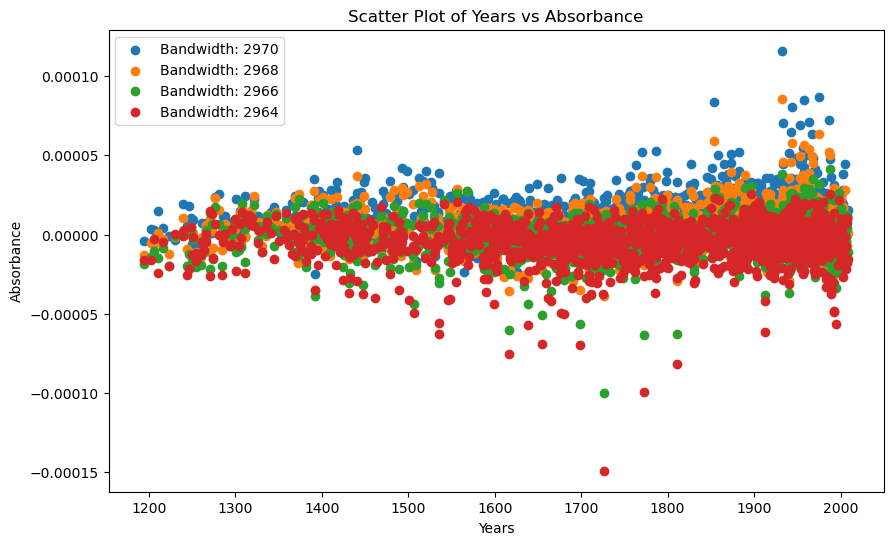

In [8]:
feature_index = 5  
x = dpsDeriv1200.iloc[:, 0]
y = dpsDeriv1200.iloc[:, 1]

plt.figure(figsize=(10, 6))  

for feature_index in range(1,5):
    plt.scatter(dpsDeriv1200.iloc[1:, 0], dpsDeriv1200.iloc[1:, feature_index], label= f'Bandwidth: {dpsDeriv1200.columns.values[feature_index]}')

plt.xlabel('Years')
plt.ylabel('Absorbance')
plt.title('Scatter Plot of Years vs Absorbance')
plt.legend()
plt.show()

# Descriptive statistics

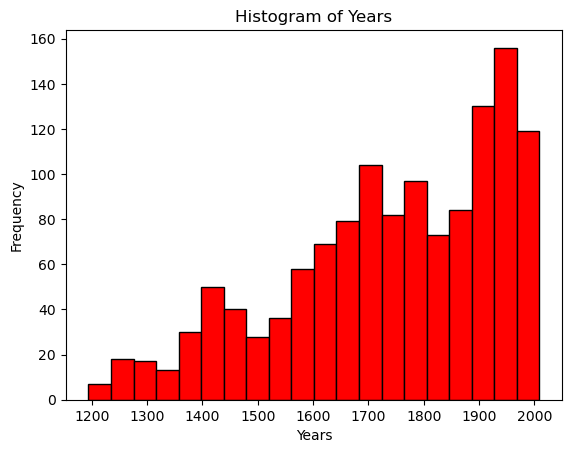

In [9]:
plt.hist(dpsDeriv1200.iloc[:, 0], bins=20, color='red', edgecolor='black')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Histogram of Years')
plt.show()

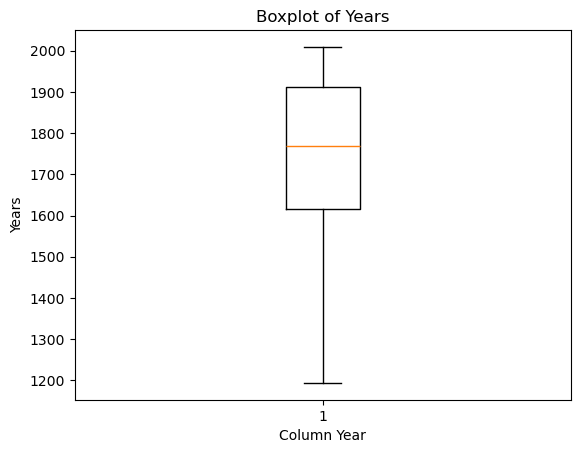

In [10]:
years = dpsDeriv1200.iloc[:, 0]

plt.boxplot(years)
plt.xlabel('Column Year')
plt.ylabel('Years')
plt.title('Boxplot of Years')

# Show the plot
plt.show()

In [11]:
print(f'The years of the data range from {min(years)} - {max(years)} years.')

The years of the data range from 1194 - 2009 years.


In [12]:
# Get summary statistics
summary_stats = years.describe()

print(summary_stats)

count    1290.000000
mean     1740.420930
std       196.420289
min      1194.000000
25%      1616.000000
50%      1769.000000
75%      1913.000000
max      2009.000000
Name: year, dtype: float64


In [13]:
spectrum = dpsDeriv1200.iloc[1:,1:]
full_spec = spectrum.columns.values
full_spec = full_spec.astype(int)

print(f'The spectrum of the data ranges from {min(full_spec)} - {max(full_spec)} cm-1.')

The spectrum of the data ranges from 800 - 2970 cm-1.


In [13]:
summary_stats = spectrum.describe()

In [17]:
means = summary_stats.iloc[1]
stds = summary_stats.iloc[2]
print(np.mean(stds))

2.0490659532610903e-05


In [15]:
print(f'The means of the different bandwidths range from {min(means)} - {max(means)} cm-1.')
print(f'The standard deviations of the different bandwidths range from {min(stds)} - {max(stds)}.')

The means of the different bandwidths range from -0.000305882142746315 - 0.00020330208533747088 cm-1.
The standard deviations of the different bandwidths range from 4.175142853676291e-06 - 6.149483243069826e-05.


## Spectra of two samples per century

In order to look at the differences in the spectra, two random samples per century were selected and plotted.

In [13]:
# Function to select 2 random samples for each century
def select_random_samples(df):
    samples = []
    for century in range(12, 21): 
        century_data = df[df['year'] // 100 == century]
        if len(century_data) >= 2:
            random_samples = century_data.sample(2)
            samples.append(random_samples)
    return pd.concat(samples)

random_samples = select_random_samples(dpsDeriv1200)

print(random_samples)

      year          2970      2968          2966      2964      2962  \
1021  1250 -6.190000e-06 -0.000016 -1.740000e-05 -0.000013 -0.000007   
410   1216  4.090000e-06 -0.000003 -8.680000e-06 -0.000005  0.000007   
402   1358  6.220000e-06  0.000007  1.070000e-05  0.000014  0.000015   
317   1382 -1.065280e-05 -0.000019 -2.059050e-05 -0.000016 -0.000009   
157   1489  2.489240e-05  0.000009 -4.155190e-06 -0.000010 -0.000010   
62    1471  4.393090e-06  0.000004  3.815610e-06  0.000006  0.000005   
436   1551  6.010000e-06 -0.000003 -1.040000e-05 -0.000013 -0.000011   
620   1589  7.400000e-06  0.000002 -1.680000e-06 -0.000002  0.000003   
1029  1637 -5.660000e-06 -0.000013 -1.390000e-05 -0.000010 -0.000003   
1125  1652 -1.580000e-06 -0.000008 -1.180000e-05 -0.000008  0.000003   
1271  1782 -4.830000e-07 -0.000007 -9.810000e-06 -0.000008 -0.000001   
580   1744  2.530000e-05  0.000017  7.760000e-06 -0.000003 -0.000014   
878   1864  1.720000e-05  0.000014  1.060000e-05  0.000008  0.00

In [14]:
y = random_samples.iloc[:,1:]
xp = y.columns.values
xp = xp.astype(int)

Look at all spectra ungrouped.

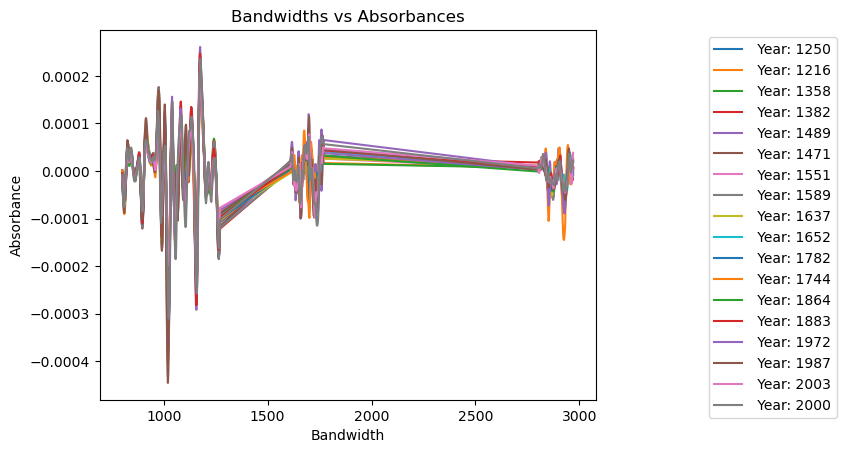

In [15]:
n = 0
for row in y.iterrows():
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}')
    n += 1

plt.title('Bandwidths vs Absorbances')
plt.xlabel('Bandwidth')
plt.ylabel('Absorbance')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()


Grouping two centuries together and look at the spectrum. 

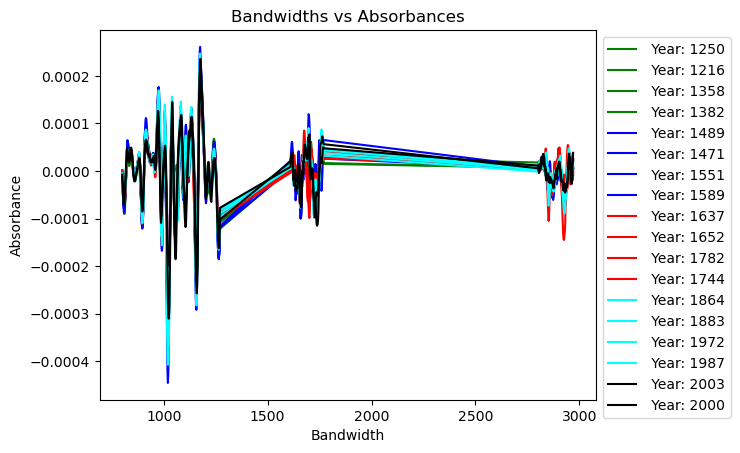

In [16]:
# Assign colors based on centuries
century_colors = {12: 'green', 13: 'green', 14: 'blue', 15: 'blue', 16: 'red', 17: 'red', 18: 'cyan', 19: 'cyan', 20: 'black'}

n = 0
for row in y.iterrows():
    century = int(str(random_samples.iloc[n,0])[:2])  # Extract century from the Year
    plt.plot(xp, row[1], label=f' Year: {random_samples.iloc[n,0]}', color=century_colors.get(century)) 
    n += 1

plt.title('Bandwidths vs Absorbances')
plt.xlabel('Bandwidth')
plt.ylabel('Absorbance')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


# Heatmap of the Input Spectra

In [17]:
features = dpsDeriv1200.iloc[:, 1:].values
labels = dpsDeriv1200.iloc[:, 0].values

In [18]:
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [19]:
test_labels_2d = test_labels.reshape(-1, 1)
test_data_all = np.concatenate((test_labels_2d, test_data), axis=1)

sorted_indices = np.argsort(test_data_all[:, 0])
test_all_sorted = test_data_all[sorted_indices]

sorted_test_labels = test_all_sorted[:, 0]
sorted_test_data = test_all_sorted[:, 1:]

In [20]:
y = dpsDeriv1200.iloc[:,1:]
xp = y.columns.values
xp = xp.astype(int)

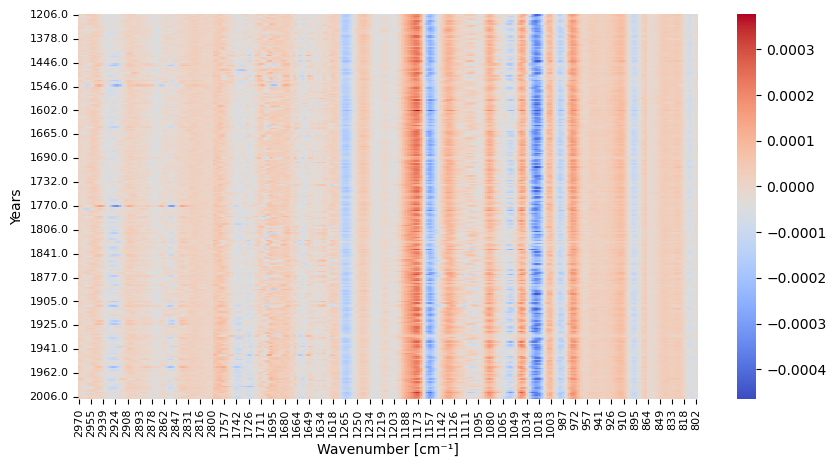

In [21]:
wavelengths = xp[::8]

years = sorted_test_labels[::16]

# Plot Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(sorted_test_data, cmap='coolwarm')
plt.xlabel('Wavenumber [cm⁻¹]')
plt.ylabel('Years')
#plt.title('Input Spectra Heatmap')
plt.xticks(ticks=np.arange(0.5, sorted_test_data.shape[1] + 0.5, 8), labels=wavelengths, fontsize=8)
plt.yticks(ticks=np.arange(0.5, sorted_test_data.shape[0] + 0.5, 16), labels=years, fontsize=8)
plt.show()